# Postprocessing Notebook for IDSM2

In [107]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [108]:
df = pd.read_csv("./simulations/tb_idsm2_1.txt", sep='\s+')

In [109]:
df

,time,x1.vout1,x1.vout2,dout,x1.p1,x1.p2
0,1.000000e-12,0.8862,0.8453,1.913000e-02,0.6730,0.809600
1,1.000000e-12,0.8863,0.8454,1.913000e-02,0.6730,0.809600
2,1.001000e-12,0.8864,0.8455,1.913000e-02,0.6729,0.809600
3,1.002000e-12,0.8865,0.8457,1.914000e-02,0.6727,0.809400
4,1.005000e-12,0.8869,0.8461,1.915000e-02,0.6723,0.808900
...,...,...,...,...,...,...
72235,2.200000e-06,0.5086,0.6042,5.916000e-08,1.2000,0.000009
72236,2.200000e-06,0.5086,0.6043,5.916000e-08,1.2000,0.000009
72237,2.200000e-06,0.5086,0.6044,5.916000e-08,1.2000,0.000009
72238,2.200000e-06,0.5086,0.6045,5.916000e-08,1.2000,0.000008


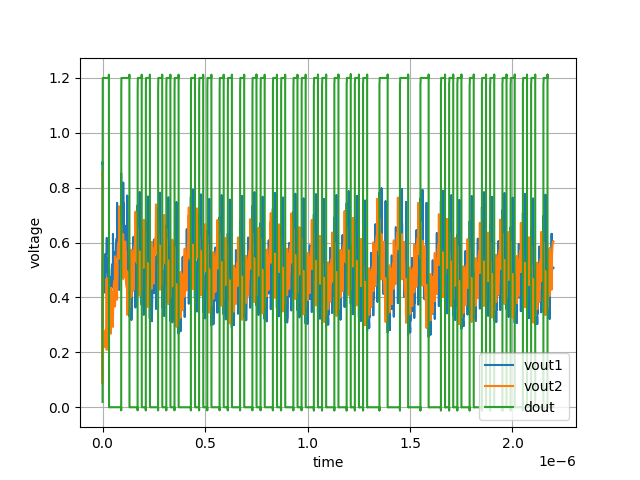

In [110]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['x1.vout1'], label="vout1")
plt.plot(df['time'], df['x1.vout2'], label="vout2")
plt.plot(df['time'], df['dout'], label="dout")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [111]:
nfiles = 5
per = 20e-9
tstart = 20e-9
N = 110
out = np.zeros([5, N])
for i in range(nfiles): 
  file = "./simulations/tb_idsm2_" + str(i+1) + ".txt"
  df = pd.read_csv(file, sep='\s+')
  dout = df['dout']
  t = df['time']
  ts = np.arange(tstart, tstart+N*per, per)
  interp_func = interp1d(t, dout)
  dsamp = interp_func(ts)
  dsamp[dsamp > 0.6] = 1
  dsamp[dsamp < 0.6] = 0
  csum = np.cumsum(dsamp)
  out[i,:] = np.cumsum(csum)/N/(N+1)

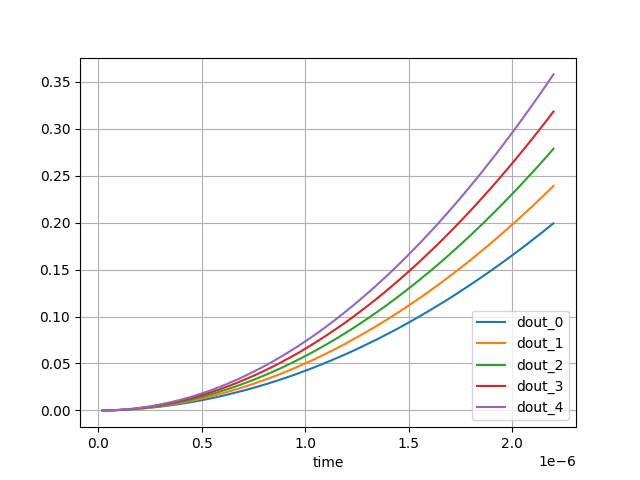

In [112]:
plt.figure(2)
plt.clf()
for i in range(nfiles):
  plt.plot(ts, out[i,:], label="dout_"+str(i))
plt.xlabel("time")
plt.legend(loc="lower right")
plt.grid()
plt.show()

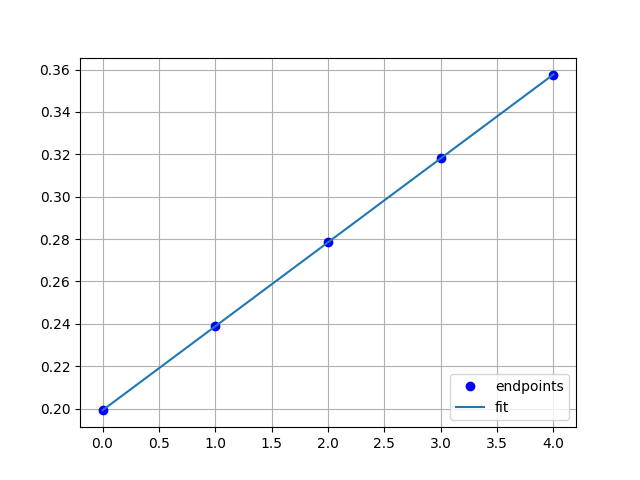

In [113]:
endpoints=(out[:,-1])
x = np.arange(nfiles)
coef = np.polyfit(x,endpoints,1)
fit = np.poly1d(coef)
plt.figure(3)
plt.clf()
plt.plot(x, endpoints, 'bo', label="endpoints")
plt.plot(x, fit(x), label="fit")
plt.legend(loc="lower right")
plt.grid()
plt.show()

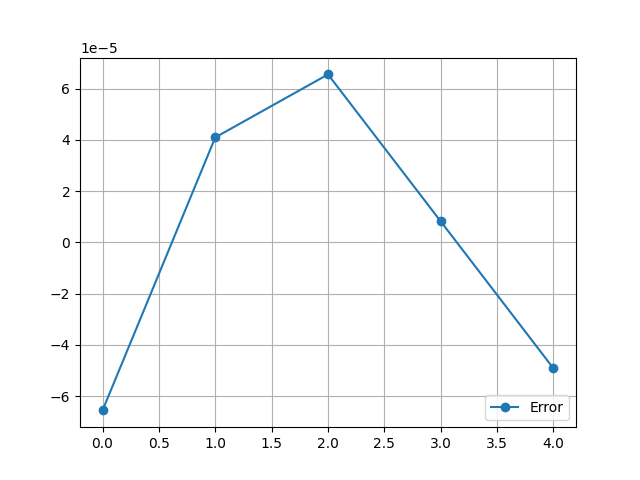

In [114]:
err = endpoints-fit(x)
plt.figure(4)
plt.clf()
plt.plot(x, err, 'o-', label="Error")
plt.legend(loc="lower right")
plt.grid()
plt.show()